This Notebook contains the analysis and required graphing for Resnet50 tuned models

In [1]:
import re
import matplotlib.pyplot as plt

Add Files to Plot in the list below

In [2]:
def parse_log(log_file):
    epochs = []
    top1_accuracy = []
    top5_accuracy = []

    with open(log_file, 'r') as f:
        for line in f:
            if 'Epoch(val)' in line:
                epoch_match = re.search(r'\[([0-9]+)\]', line)
                top1_match = re.search(r'accuracy_top-1: ([0-9.]+)', line)
                top5_match = re.search(r'accuracy_top-5: ([0-9.]+)', line)
                if epoch_match and top1_match and top5_match:
                    epochs.append(int(epoch_match.group(1)))
                    top1_accuracy.append(float(top1_match.group(1)))
                    top5_accuracy.append(float(top5_match.group(1)))

    return epochs, top1_accuracy, top5_accuracy

def plot_performance(epochs, accuracy, model_name, metric, iteration):
    plt.plot(epochs, accuracy, label=f'{model_name} - {metric}')

# List of log files
log_files = ['resnet50_data1.log',
             'resnet50_data2.log',
             'resnet50_data3.log',
             'resnet50_data4.log',
             'resnet50_data5.log',
             'resnet50_data6.log',
             'resnet50_data7.log',
             'resnet50_data8.log',
             'resnet50_data9.log'
]

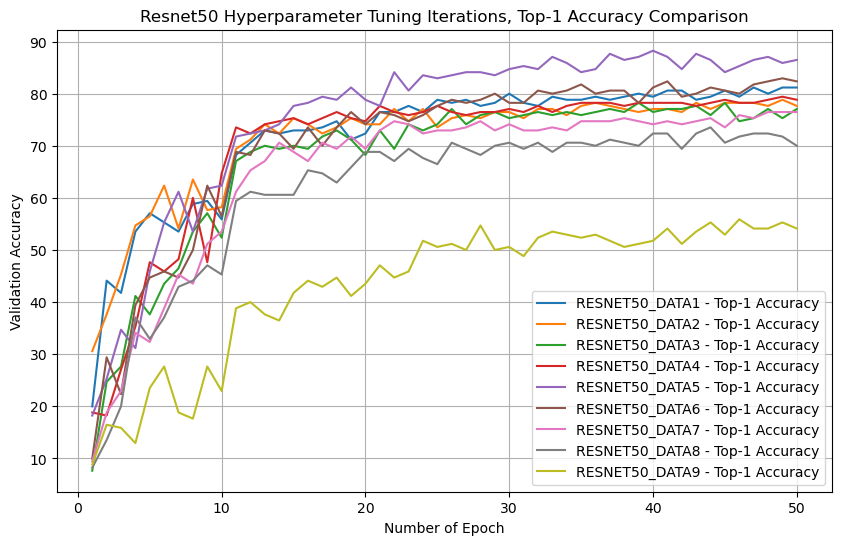

In [3]:
# Plotting Top-1 Accuracy
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for i, log_file in enumerate(log_files):
    epochs, top1_accuracy, _ = parse_log(log_file)
    model_name = log_file.split('.')[0].upper()  # Extract model name from file name
    plot_performance(epochs, top1_accuracy, model_name, 'Top-1 Accuracy', f'Iteration {i+1}')

plt.xlabel('Number of Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Resnet50 Hyperparameter Tuning Iterations, Top-1 Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

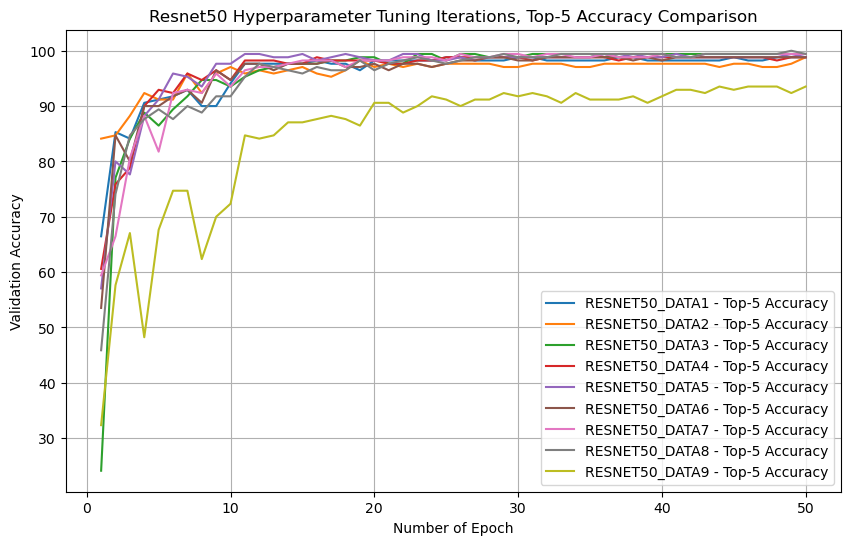

In [4]:
# Plotting Top-5 Accuracy
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for i, log_file in enumerate(log_files):
    epochs, _, top5_accuracy = parse_log(log_file)
    model_name = log_file.split('.')[0].upper()  # Extract model name from file name
    plot_performance(epochs, top5_accuracy, model_name, 'Top-5 Accuracy', f'Iteration {i+1}')

plt.xlabel('Number of Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Resnet50 Hyperparameter Tuning Iterations, Top-5 Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()